## <B>Kings Country Housing Price Analysis<B>
![](data/Houses.jpg)
* King County is located in Washington state in the US
* The biggest city in the county is Seattle, which is the most in the state and 13th populous state in the US.
* The median house price sold between 2014 and 2015 is about $550K. The most expensive house was almost $8 million.
* There are many outliers in price, that makes the prediction harder. About 10% of the rows contains at least one outliers
* The datasets also contains houses that don't look like a regular house. For example, a house with more than 30 rooms, no bedroom, or no bathroom. These houses may be a hotel, warehouse or dorm that are not conventional houses and will be converted to residential buildings.
* About 10 % of King county is water, which is mainly located on the west of the county
* Less than 1% of houses are built on the waterfront that are usually highly demanded. In King County, the average waterfront house price is $1,661,876.02.
* The average house price in 4 areas representing with the zipcodes, 98039, 98004, 98040, and 98112 exceeds $1,000,000. Among of those, the average house price in 98039 is outstanding with over $2,000,000.
* When 'grade' increases, the house price increases exponentially.  

In [1]:
#### Import the libraries needed
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#### Read the dataset from the file
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Exploratory Data Analysis

#### Basic Statistics - Shape, Datatype, Distribution
* The dataset has **21613** rows, **21** columns
* *'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15'*, and *'sqft_lot15'* are right skewed.
* The rest of variables are not normally distributed either. 
* *'bedrooms', 'bathrooms', 'waterfront', 'view', 'sqft_basement', 'yr_renovated'* have a minimum value of 0, which means that a house has no such features.
* The target variable, *'price'* is heavily skewed

|Stats|Value|
|:-----|----:|
|Min:|$75,000|
|Max: |$7,700,000|
|Median:|$450,000|
|Mean:|$540,088|

In [3]:
#### Print the dataset info
# EDA 2
# Define a function to print basic stats

def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    
get_basic_stats(df, 'Kings County Housing Price')

--------<Kings County Housing Price>--------

----------------------------------------------------
Kings County Housing Price has 21613 rows
Kings County Housing Price has 21 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  in

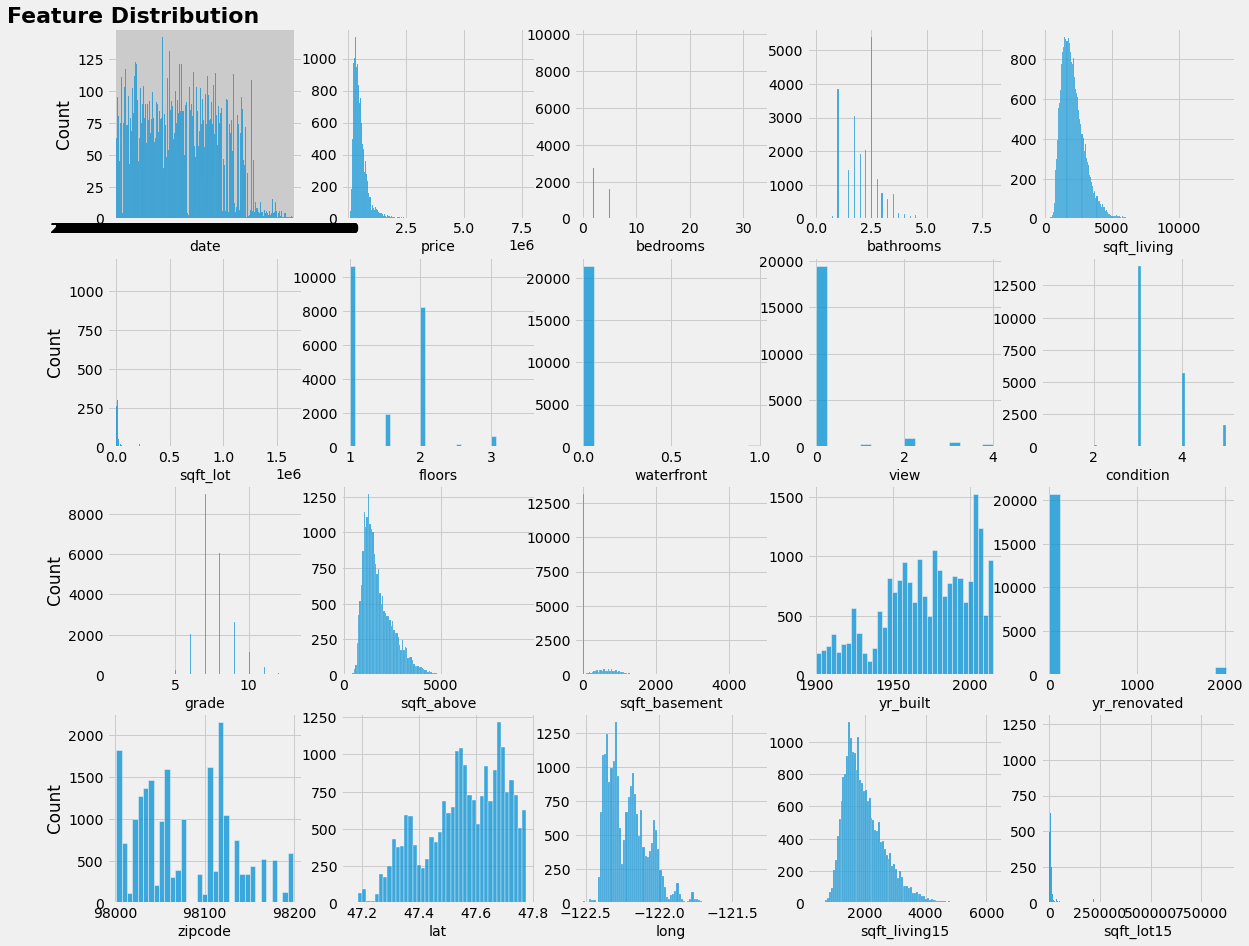

In [4]:
#EDA 2
# Check distribution 
i = 4
j = 5
r, c = 0, 0
plt.style.use("fivethirtyeight")
fig, axs = plt.subplots(i, j, figsize=(18, 15))
#plt.subplots_adjust(hspace=0.35)
plt.suptitle("Feature Distribution", weight='bold', fontsize=22, x=0.1, y=0.9)
cols = df.columns
idx = 1
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(df[cols[idx]], ax=axs[r][c])
        axs[r][c].set_xlabel(cols[idx], fontsize=14)
        if c != 0:
            axs[r][c].set_ylabel("")
        c += 1
        idx += 1
    r += 1
    c = 0

#### Missing Value Analysis
* The dataset has no missing values

In [5]:
#### Check for NA values in it
# Check missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
### Remove 'id', 'lat', and 'long' 
df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

#### Outlier Analysis
* There are many outliers

In [7]:
# Define a function to return a list of indicater of outliers
# True --> outlier, False --> not outlier 
def get_outliers(my_list):
    outliers = []
    # Get 25% percentile and 75% percentile
    percentile_25 = np.percentile(my_list, 25)
    percentile_75 = np.percentile(my_list, 75)
    # Get Inter Quartile Range
    iqr = percentile_75 - percentile_25
    # Get outliers
    lower_outliers = percentile_25 - iqr * 1.5 
    upper_outliers = percentile_75 + iqr * 1.5
    # outliers
    outliers = ((lower_outliers > my_list) | (my_list > upper_outliers))
    return outliers 

# Check outliers
print(f"--------------- Outliers for Columns ---------------")
for col in df.columns:
    if df[col].dtype != 'object':
        outliers = df[get_outliers(df[col])]
        print(f"\"{col}\" has {len(outliers)} outliers, {round(len(outliers)/len(df)*100, 2)}%")
        #print(outliers)

--------------- Outliers for Columns ---------------
"price" has 1146 outliers, 5.3%
"bedrooms" has 546 outliers, 2.53%
"bathrooms" has 571 outliers, 2.64%
"sqft_living" has 572 outliers, 2.65%
"sqft_lot" has 2425 outliers, 11.22%
"floors" has 0 outliers, 0.0%
"waterfront" has 163 outliers, 0.75%
"view" has 2124 outliers, 9.83%
"condition" has 30 outliers, 0.14%
"grade" has 1911 outliers, 8.84%
"sqft_above" has 611 outliers, 2.83%
"sqft_basement" has 496 outliers, 2.29%
"yr_built" has 0 outliers, 0.0%
"yr_renovated" has 914 outliers, 4.23%
"zipcode" has 0 outliers, 0.0%
"sqft_living15" has 544 outliers, 2.52%
"sqft_lot15" has 2194 outliers, 10.15%


In [8]:
### 'date' --> Convert to datetime, create 'year_month', and aggregate data (mean, count)
df['date'] = pd.to_datetime(df['date'])

# Sort df by date order
df = df.sort_values('date')
df['month_year'] = df['date'].dt.to_period('M')
# group by year & month, and month
df_groupby_year_month = df.groupby('month_year')[['price']].\
                            agg(mean_price=('price', 'mean'), number_of_sales=('price', 'count')).reset_index()

#### Is house price increasing over time?
* It seems house price is not increasing during May 2014 and 2015. It stays around the average value.

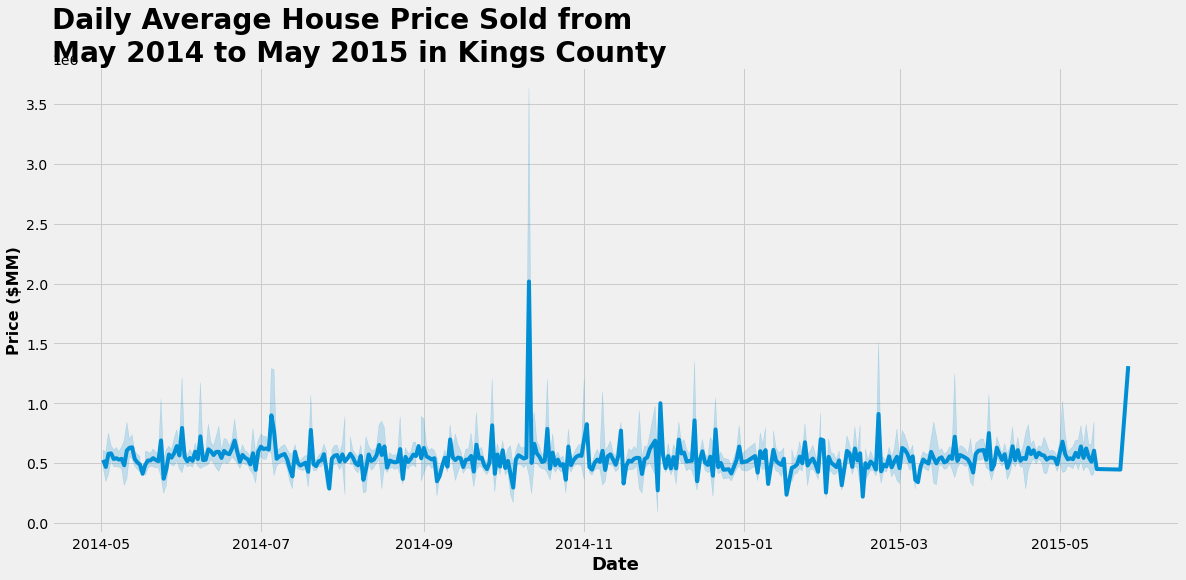

In [6]:
# Drow lineplot to see how the price shifts
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Daily Average House Price Sold from \nMay 2014 to May 2015 in Kings County", weight='bold', fontsize=28, loc='left', x=0, y=1)

sns.lineplot(df['date'], df['price'])
ax.set_xlabel("Date", fontsize=18, weight='bold')
ax.set_ylabel("Price ($MM)", fontsize=16, weight='bold');

#### House Price Vary by Zipcode?
* Kings county's average house price is $540K, however, there are many outliers.
* Kings county is located in Washington state in the US. Less than 1% of houses are built on waterfron, whose average price is alomost $1.7 million. Waterfront house prices is much higher than the others. Houses in certain zipcodes that have water should more valuable.
* The houses in these zipcodes, 98039, 98004, 98040, and 98112 are extremely high.

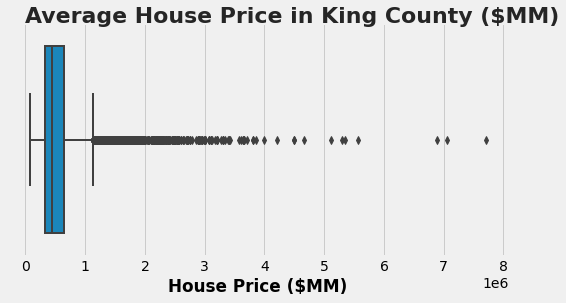

In [7]:
# Draw boxplots for Average House Price
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 4))
ax.text(1.0, -0.5, "Average House Price in King County ($MM)", fontsize=22, weight='bold',color='#252525')

sns.boxplot('price', data=df, linewidth=2)
ax.set_xlabel("House Price ($MM)", weight='bold');

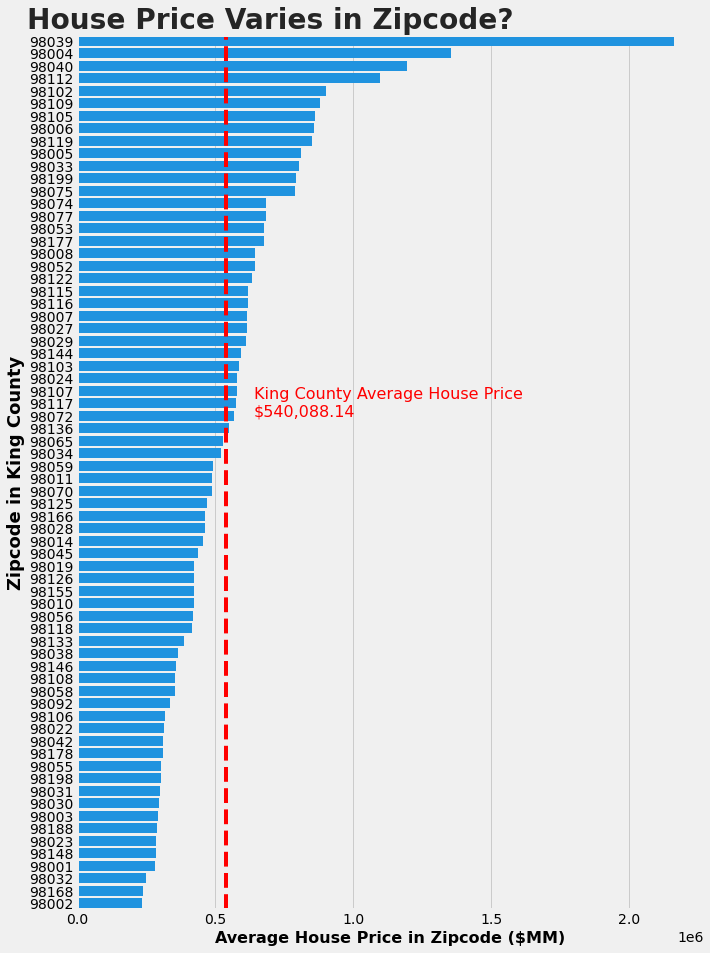

In [8]:
### 'zipcode', '' --> Create boxplots
# Obtain the average house price by zipcode
group_by_zipcode = df.groupby('zipcode')[['price']].agg('mean').sort_values('price', ascending=False).reset_index()

avg_price = df['price'].mean()

plt.style.use("fivethirtyeight")
_, ax = plt.subplots(figsize=(10, 15))
plt.title("House Price Varies in Zipcode?", weight='bold', fontsize=28, x=-0.08, y=1.0, loc='left', color='#252525')
plt.text(avg_price+100000, 30, f"King County Average House Price\n${avg_price:,.2f}", fontsize=16, color='r')

sns.barplot(group_by_zipcode['price'], group_by_zipcode['zipcode'].astype(str), ax=ax, color='#009AFF')
ax.axvline(avg_price, ls='--', c='r')
ax.set_ylabel("Zipcode in King County", fontsize=18, weight='bold')
ax.set_xlabel("Average House Price in Zipcode ($MM)", fontsize=16, weight='bold');

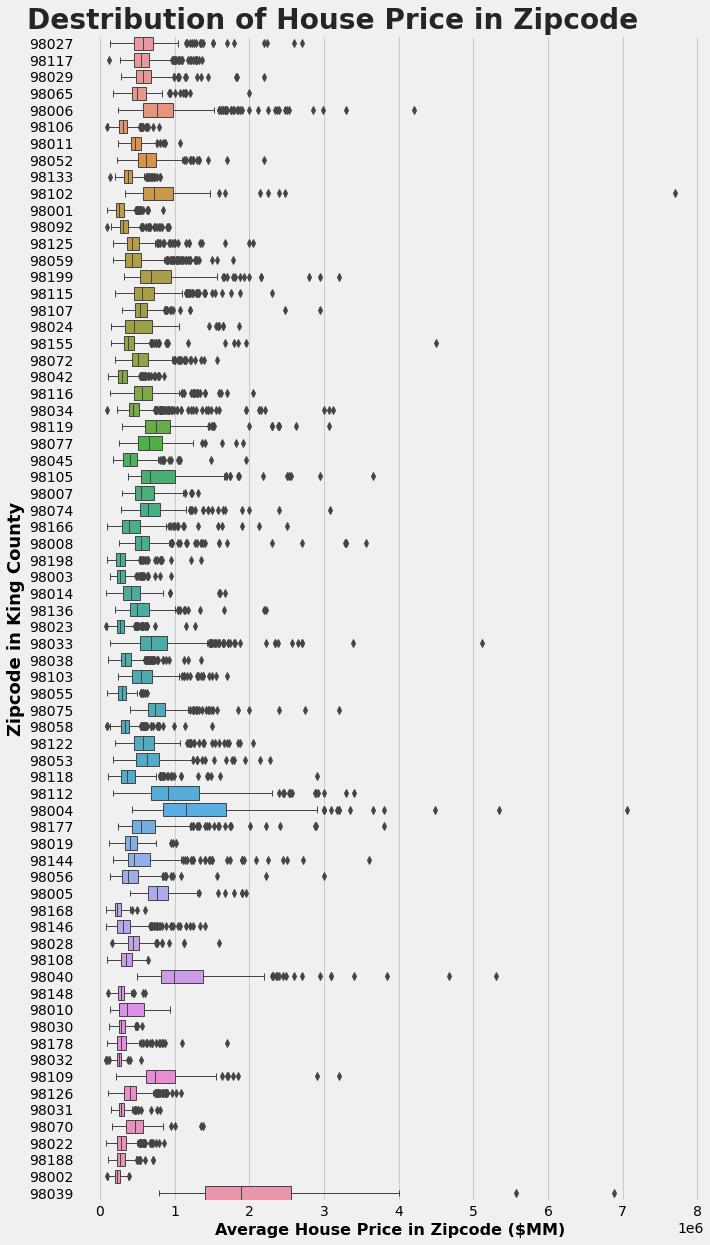

In [9]:
# Draw [plot a boxplot 
plt.style.use('fivethirtyeight') 
_, ax = plt.subplots(figsize=(10, 20))
plt.subplots_adjust(hspace=3, wspace=3)
plt.title("Destribution of House Price in Zipcode", weight='bold', fontsize=28, x=-0.08, y=1.0, loc='left', color='#252525')

sns.boxplot(df['price'], df['zipcode'].astype(str), linewidth=1)
ax.set_ylabel("Zipcode in King County", fontsize=18, weight='bold')
ax.set_xlabel("Average House Price in Zipcode ($MM)", fontsize=16, weight='bold');

#### Bedrooms and Bathrooms
* As the number of bedrooms and bath rooms increase, the average house price also increases.
* Itseems The number of bathrooms affecs the house price more than the number of bedrooms.
* The number of bedrooms and bathrooms contain 16 outliers: 0 bathrooms, 0 bedrooms and 33 bedrooms. 

In [9]:
# Remove houses that have no bathrooms or bedrooms
min_bedrooms =  df['bedrooms'].min()
max_bedrooms =  df['bedrooms'].max()

print(f"Minimum number of bedrooms: {min_bedrooms}")
print(f"{df[df['bedrooms'] == min_bedrooms]['bedrooms'].count()} record(s) exist(s)")
print(f"Maxmum number of bedrooms: {max_bedrooms}")
print(f"{df[df['bedrooms'] == max_bedrooms]['bedrooms'].count()} record(s) exist(s)\n")

min_bathrooms =  df['bathrooms'].min()
max_bathrooms =  df['bathrooms'].max()

print(f"Minimum number of bathrooms: {min_bathrooms}")
print(f"{df[df['bedrooms'] == min_bathrooms]['bathrooms'].count()} record(s) exist(s)")
print(f"Maxmum number of bathrooms: {max_bathrooms}")
print(f"{df[df['bedrooms'] == min_bathrooms]['bathrooms'].count()} record(s) exist(s)\n")

no_br_or_br = (df['bedrooms'] == min_bedrooms) | (df['bathrooms'] == min_bathrooms)
no_br_and_br = (df['bedrooms'] == min_bedrooms) & (df['bathrooms'] == min_bathrooms)


print(f"{no_br_or_br.sum()} houses don't have either bathroom OR bedroom")
print(f"{no_br_and_br.sum()} houses don't have BOTH bathroom AND bedroom" )

Minimum number of bedrooms: 0
13 record(s) exist(s)
Maxmum number of bedrooms: 33
1 record(s) exist(s)

Minimum number of bathrooms: 0.0
13 record(s) exist(s)
Maxmum number of bathrooms: 8.0
13 record(s) exist(s)

16 houses don't have either bathroom OR bedroom
7 houses don't have BOTH bathroom AND bedroom


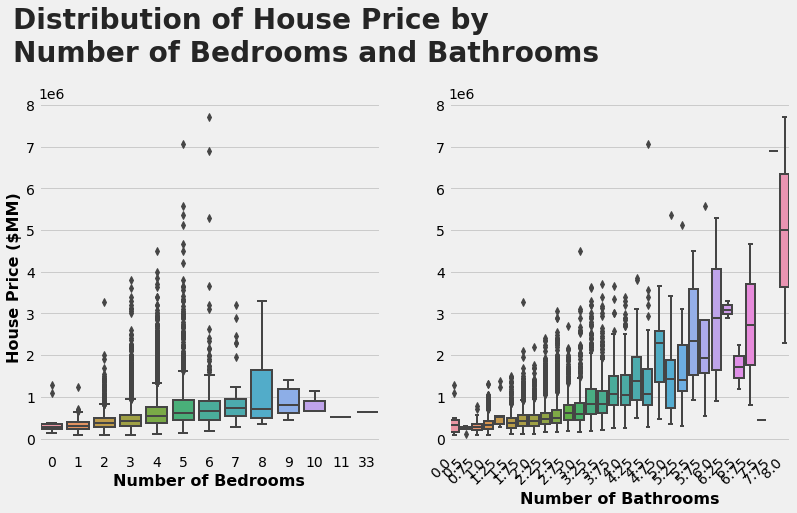

In [10]:
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle("Distribution of House Price by\nNumber of Bedrooms and Bathrooms", x=0.05, y=1.1, 
             ha='left', fontsize=28, weight='bold',color='#252525')
box1 = sns.boxplot(df['bedrooms'], df['price'], ax=ax1, linewidth=2)
ax1.set_xlabel('Number of Bedrooms', fontsize=16, weight='bold')
ax1.set_ylabel('House Price ($MM)', fontsize=16, weight='bold')
box2 = sns.boxplot(df['bathrooms'], df['price'], ax=ax2, linewidth=2)
ax2.set_xlabel('Number of Bathrooms', fontsize=16, weight='bold')
ax2.set_ylabel('')
box2.set_xticklabels(box2.get_xticklabels(), rotation=45, ha='right');

#### Other features
* When the grade increases, the house price increases exponentially.
* The average house price of waterfront houses and non-waterfron houses are different.
* The waterfront house average is almost $1.7, which is higher than 75% percentile of non-waterfront houses.
* About 1.5% of houses has the view score 4, whose average house price is about $1.5 million.
* 135 of the waterfront houses have the view score 4


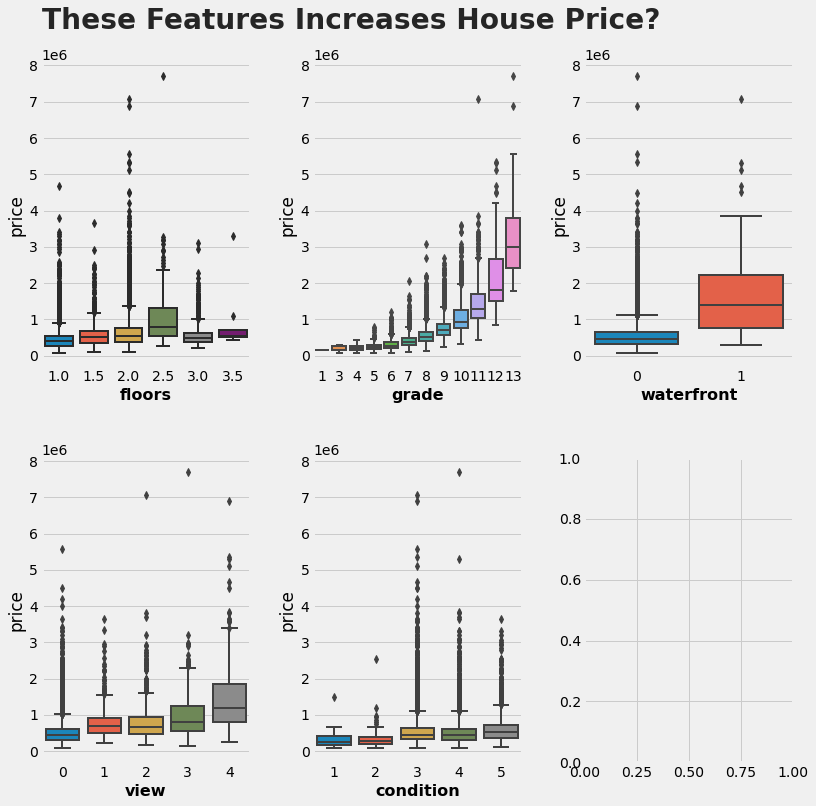

In [23]:
# EDA 5
# Draw boxplots for descrete variables and price
plt.style.use('fivethirtyeight')

i = 2
j = 3
fig, axs = plt.subplots(i, j, figsize=(12, 12), squeeze=False)
plt.subplots_adjust(hspace=0.3, wspace=0.3) 
axs[0][0].text(-0.5, 9000000, "These Features Increases House Price?", fontsize=28, weight='bold',color='#252525')
cols = ['floors', 'grade', 'waterfront', 'view', 'condition']
r = c = 0
for col in cols:
    if c == j:
        if r == i:
            break
        c = 0
        r += 1
    sns.boxplot(col, 'price', data=df, ax = axs[r][c], linewidth=2)
    axs[r][c].set_xlabel(col, fontsize=16, weight='bold')
    c += 1

In [11]:
# Get the statistics for 'view'==4
view4_house = df[df['view'] == 4]
view4_house = view4_house.sort_values('price', ascending=False)

print("Statistics for houses with view score 4")
print("------------------------------------------")
print(f"Average House Price: ${view4_house['price'].mean():,.2f}")
print(f"Min House Price: ${view4_house['price'].min():,.2f}")
print(f"Max House Price: ${view4_house['price'].max():,.2f}")
print(f"Number of Houses Built on Waterfront: {view4_house['price'].count()}\n")

# Get the statistics for 'waterfront'
waterfront_house = df[df['waterfront'] == 1]
waterfront_house = waterfront_house.sort_values('price', ascending=False)

print("Statistics for houses build on waterfront")
print("------------------------------------------")
print(f"Average House Price: ${waterfront_house['price'].mean():,.2f}")
print(f"Min House Price: ${waterfront_house['price'].min():,.2f}")
print(f"Max House Price: ${waterfront_house['price'].max():,.2f}")
print(f"Number of Houses Built on Waterfront: {waterfront_house['price'].count()}\n")


print(f"The number of houses that is bulit on waterfront: {len(df[(df['view'] == 4) & (df['waterfront'] == 1)])}")

Statistics for houses with view score 4
------------------------------------------
Average House Price: $1,463,711.24
Min House Price: $252,000.00
Max House Price: $6,885,000.00
Number of Houses Built on Waterfront: 319

Statistics for houses build on waterfront
------------------------------------------
Average House Price: $1,661,876.02
Min House Price: $285,000.00
Max House Price: $7,062,500.00
Number of Houses Built on Waterfront: 163

The number of houses that is bulit on waterfront: 135


Statistics for houses build on waterfront
------------------------------------------
Average House Price: $1,661,876.02
Min House Price: $285,000.00
Max House Price: $7,062,500.00
Number of Houses Built on Waterfront: 163


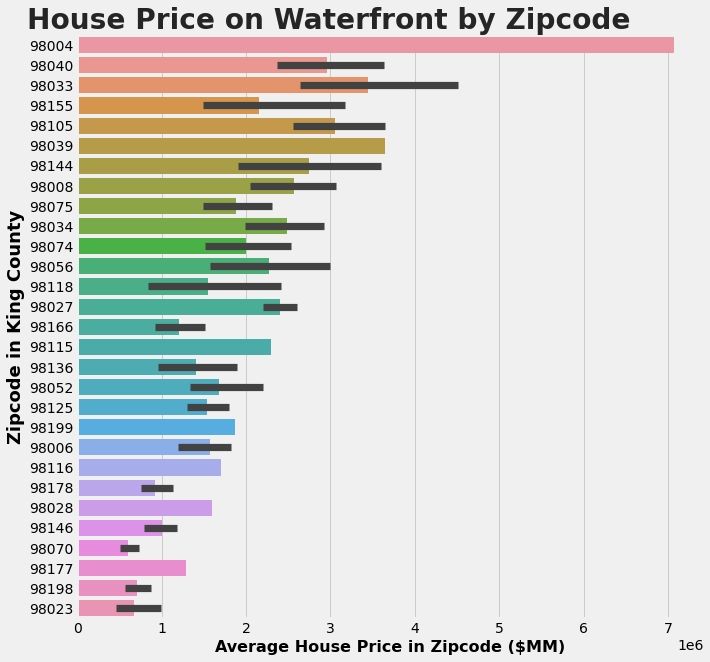

In [24]:
# Get the statistics for 'waterfront' and 'view'==4
# Draw barplots
plt.style.use('fivethirtyeight')

_, ax = plt.subplots(figsize=(10, 10))
plt.subplots_adjust(hspace=3, wspace=3)
plt.title("House Price on Waterfront by Zipcode", weight='bold', fontsize=28, x=-0.08, y=1.0, loc='left', color='#252525')

sns.barplot(waterfront_house['price'], waterfront_house['zipcode'].astype(str))
ax.set_ylabel("Zipcode in King County", fontsize=18, weight='bold')
ax.set_xlabel("Average House Price in Zipcode ($MM)", fontsize=16, weight='bold');

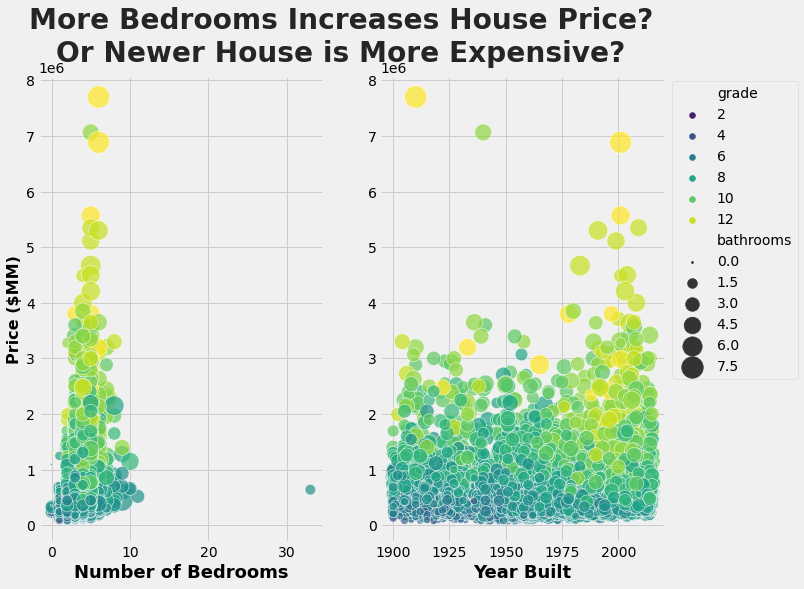

In [25]:
### 'bedrooms', 'bathrooms' --> Create scatterplots
from turtle import color

plt.style.use("fivethirtyeight")
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
plt.suptitle("More Bedrooms Increases House Price?\nOr Newer House is More Expensive?", 
             weight='bold', fontsize=28, x=0.5, y=1,color='#252525')

color_palette = sns.color_palette("viridis", as_cmap=True)
sc1 = sns.scatterplot(df['bedrooms'], df['price'], data=df, hue='grade', size='bathrooms', sizes=(5, 500), alpha=0.7, palette=color_palette, ax=ax1)
sc2 = sns.scatterplot(df['yr_built'], df['price'], data=df, hue='grade', size='bathrooms', sizes=(5, 500), alpha=0.7, palette=color_palette, ax=ax2)
ax1.set_xlabel("Number of Bedrooms", fontsize=18, weight='bold')
ax1.set_ylabel("Price ($MM)", fontsize=16, weight='bold')
ax2.set_xlabel("Year Built", fontsize=18, weight='bold')
ax2.set_ylabel("")

sc2.legend_.remove()
ax1.legend(loc='center left', bbox_to_anchor=(2.2, .67), ncol=1);

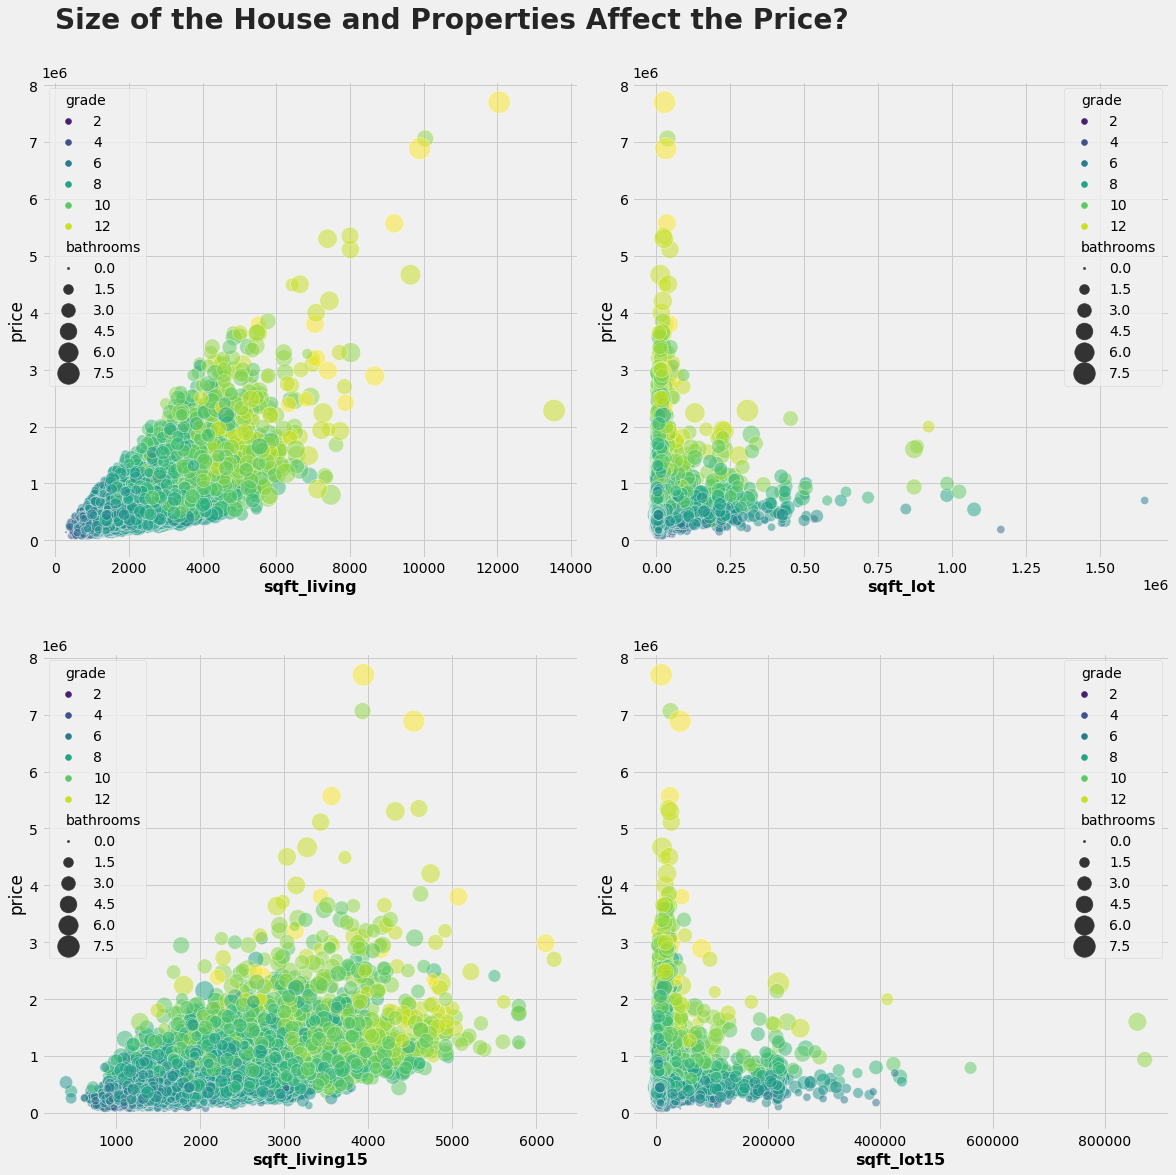

In [26]:
### 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15' --> Create lineplots and  
plt.style.use("fivethirtyeight")

# plt.title("More Bedrooms Increases House Price?", weight='bold', fontsize=28, x=0.5, y=1.1)
# ax.text(s="Grade and Number of Bathrooms Affect the Price?", fontsize=20, x=-1.3, y=8500000)

i = 2
j = 2
fig, axs = plt.subplots(i, j, figsize=(18, 18), squeeze=False)
plt.subplots_adjust(hspace=0.2, wspace=0.1) 
axs[0][0].text(-0.5, 9000000, "Size of the House and Properties Affect the Price?", fontsize=28, weight='bold',color='#252525')

cols = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
color_palette = sns.color_palette("viridis", as_cmap=True)
r = c = 0
for col in cols:
    if c == j:
        if r == i:
            break
        c = 0
        r += 1
    sns.scatterplot(df[col], df['price'], data=df, ax = axs[r][c], hue='grade', size='bathrooms', sizes=(5, 500), alpha=0.5, palette=color_palette)
    axs[r][c].set_xlabel(col, fontsize=16, weight='bold')
    c += 1

Price greater than $1,614,150.00 are extreme outliers
420 extreme outliers


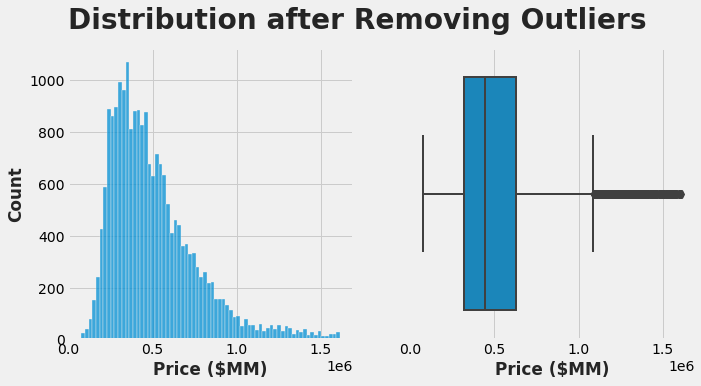

In [12]:
# Remove extreme outliers in price, which beyond 
iqr = np.percentile(df['price'], 75) - np.percentile(df['price'], 25)
price_extreme_outliers = np.percentile(df['price'], 75) + iqr * 3.0

number_of_extreme_outliers = len(df[df['price'] >= price_extreme_outliers])
df_without_extreme_outliers = df[df['price'] < price_extreme_outliers]
print(f"Price greater than ${price_extreme_outliers:,.2f} are extreme outliers")
print(f"{number_of_extreme_outliers} extreme outliers")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.text(-100, 1200, "Distribution after Removing Outliers", fontsize=28, weight='bold',color='#252525')
sns.histplot(df_without_extreme_outliers['price'], ax=ax1)
sns.boxplot(df_without_extreme_outliers['price'], ax=ax2, linewidth=2)
ax1.set_xlabel("Price ($MM)", weight='bold',color='#252525')
ax1.set_ylabel("Count", weight='bold',color='#252525')
ax2.set_xlabel("Price ($MM)", weight='bold',color='#252525');

### Feature Selection
* From the Pearson Correalation Coefficient on the heatmap, some features are highly correalted
* 'grade', 'sqft_living', 'sqft_living15', 'sqft_above' and 'bathrooms' are the top 5 highest correlation to 'price'
* 'sqft_living' is highly correlated to 'sqft_above', 'sqft_living15' and 'bathrooms', whose correlation coefficients are greater than 0.7.
* 'sqft_lot' and 'sqft_lot15' are highly correlated.

In [8]:
# Import modules
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest

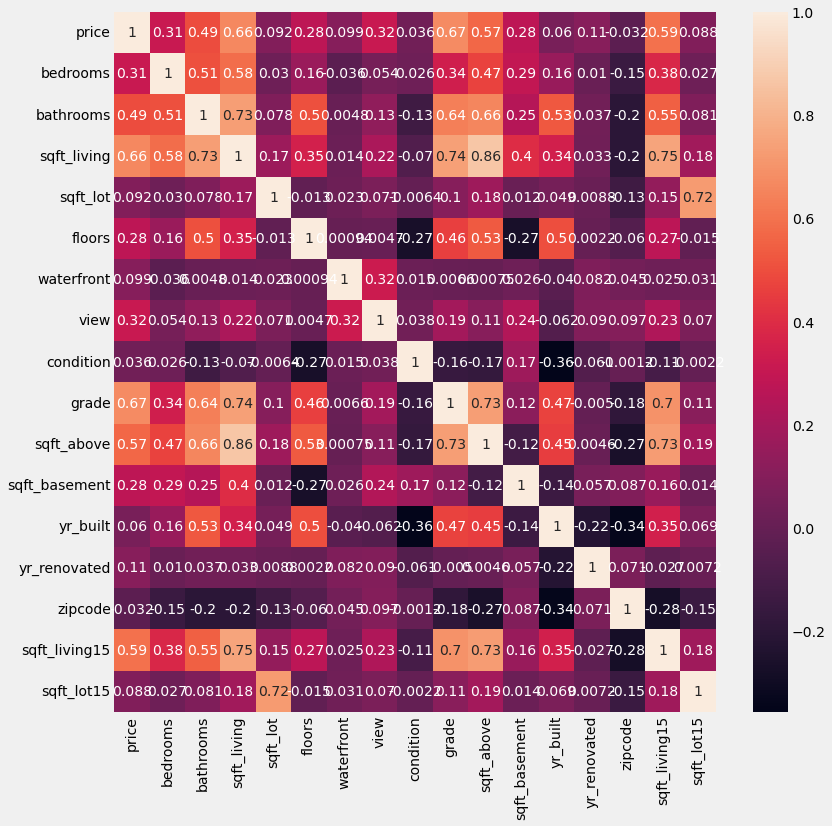

In [13]:
# Check Correlation
X_corr = df_without_extreme_outliers.corr()

fig, ax = plt.subplots(figsize=(12, 12))
ax1.text(-100, 1200, "Correlation ", fontsize=28, weight='bold',color='#252525')
sns.heatmap(X_corr, annot=True);

In [30]:
### The pearson correlation values show 'grade', 'sqft_living', 'sqft_living15', and 'sqft_above' have influence on price
# 'grade' is highly correlated with 'sqft_living' , 'sqft_living15', and 'sqft_above'
# Separate independent variables and dependent variable

X = df_without_extreme_outliers.drop(['price', 'date', 'month_year'], axis=1)
#X = df_without_extreme_outliers[['grade', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built']]
y = df_without_extreme_outliers['price']

In [31]:
# Standardize the features using (x - mean) / std
X_scaled = (X - X.mean()) / X.std()

In [55]:
# # Standardize features
# from sklearn.preprocessing import StandardScaler
# stand= StandardScaler()
# standardized = stand.fit(X)
# standardized_X = standardized.transform(X)
# cols = X.columns.values
# standardized_X = pd.DataFrame(standardized_X, columns=cols)

### Model Creation

In [17]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [32]:
# Create Linear Regression, Rasso and LassoCV using all features

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=327)

kfold = KFold(n_splits=100, shuffle=True, random_state=327)

# Create LinearRegression model
lr_model = LinearRegression().fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)
# Check performance of LinearRegression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("------------ Liner Regression Model ------------")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R2: {lr_r2}")

# Create Lasso model
lasso_model = Lasso(alpha=172).fit(X_train, y_train)
# Predict
y_pred_lasso = lasso_model.predict(X_test)
# Check performance of LinearRegression model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("------------------- Lasso Model ----------------")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"R2: {lasso_r2}")

# Create LassoCV model
lassoCV_model = LassoCV(cv=kfold).fit(X_train, y_train)
# Predict
y_pred_lassoCV = lassoCV_model.predict(X_test)
# Check performance of LinearRegression model
lassoCV_mae = mean_absolute_error(y_test, y_pred_lassoCV)
lassoCV_mse = mean_squared_error(y_test, y_pred_lassoCV)
lassoCV_r2 = r2_score(y_test, y_pred_lassoCV)

print("------------------- LassoCV Model ----------------")
print(f"MAE: {lassoCV_mae}")
print(f"MSE: {lassoCV_mse}")
print(f"R2: {lassoCV_r2}")
print(f"Alpha: {lassoCV_model.alpha_}\n")

# Compare the train data and test data performance
y_pred_train_lassoCV = lassoCV_model.predict(X_train)
lassoCV_train_r2 = r2_score(y_train, y_pred_train_lassoCV)

print(f"R2: {lassoCV_train_r2}")

------------ Liner Regression Model ------------
MAE: 115490.24082581686
MSE: 24155727375.28861
R2: 0.6372868421317944
------------------- Lasso Model ----------------
MAE: 115508.66760793299
MSE: 24156471013.59737
R2: 0.6372756759435405
------------------- LassoCV Model ----------------
MAE: 115508.70240042623
MSE: 24156465968.16924
R2: 0.6372757517037585
Alpha: 172.29735252261776

R2: 0.6296007777224326


In [43]:
# Feature Selection
# Extract features whose correlation coefficient is greater 0.5
feature_selected = X_corr[X_corr['price'] > 0.5].index.values
# Remove 'price'
feature_selected = feature_selected[1:]
X = df_without_extreme_outliers[feature_selected]

array(['sqft_living', 'grade', 'sqft_above', 'sqft_living15'],
      dtype=object)

In [45]:
# Standardize the features using (x - mean) / std
X_scaled = (X - X.mean()) / X.std()

In [46]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=327)

# Create LinearRegression model
lr_model = LinearRegression().fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)
# Check performance of LinearRegression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("------------ Liner Regression Model ------------")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R2: {lr_r2}")

------------ Liner Regression Model ------------
MAE: 132918.38621127806
MSE: 31313284371.786068
R2: 0.5298117054701212


In [49]:
# Create Lasso model
lasso_model = Lasso(alpha=172).fit(X_train, y_train)
# Predict
y_pred_lasso = lasso_model.predict(X_test)
# Check performance of LinearRegression model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("------------------- Lasso Model ----------------")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"R2: {lasso_r2}")

------------------- Lasso Model ----------------
MAE: 132920.05493902095
MSE: 31313787226.403957
R2: 0.5298041547976216


In [50]:
# Create LassoCV model
lassoCV_model = LassoCV(cv=kfold).fit(X_train, y_train)
# Predict
y_pred_lassoCV = lassoCV_model.predict(X_test)
# Check performance of LinearRegression model
lassoCV_mae = mean_absolute_error(y_test, y_pred_lassoCV)
lassoCV_mse = mean_squared_error(y_test, y_pred_lassoCV)
lassoCV_r2 = r2_score(y_test, y_pred_lassoCV)

print("------------------- LassoCV Model ----------------")
print(f"MAE: {lassoCV_mae}")
print(f"MSE: {lassoCV_mse}")
print(f"R2: {lassoCV_r2}")
print(f"Alpha: {lassoCV_model.alpha_}\n")

# Compare the train data and test data performance
y_pred_train_lassoCV = lassoCV_model.predict(X_train)
lassoCV_train_r2 = r2_score(y_train, y_pred_train_lassoCV)

print(f"R2: {lassoCV_train_r2}")

------------------- LassoCV Model ----------------
MAE: 132920.06059221886
MSE: 31313789033.87906
R2: 0.5298041276572671
Alpha: 172.29735252261776

R2: 0.5275380292002092


In [52]:
from sklearn.feature_selection import RFE

X = df_without_extreme_outliers.drop(['price', 'date', 'month_year'], axis=1)
y = df_without_extreme_outliers['price']
# Standardize the features using (x - mean) / std
X_scaled = (X - X.mean()) / X.std()

In [53]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=327)

rfe = RFE(LinearRegression(), step=1, n_features_to_select=2)
rfe_lr_model = rfe.fit(X_train, y_train)

# Predict
y_pred_rfe_lr = rfe_lr_model.predict(X_test)
# Check performance of LinearRegression model
rfe_lr_mae = mean_absolute_error(y_test, y_pred_rfe_lr)
rfe_lr_mse = mean_squared_error(y_test, y_pred_rfe_lr)
rfe_lr_r2 = r2_score(y_test, y_pred_rfe_lr)

print("------------ Liner Regression Model ------------")
print(f"MAE: {rfe_lr_mae}")
print(f"MSE: {rfe_lr_mse}")
print(f"R2: {rfe_lr_r2}")

rfe_lr_support = rfe_lr_model.support_
rfe_lr_ranking = rfe_lr_model.ranking_

print(f"Features: {rfe_lr_support}")
print(f"Feature Importance Ranking: {rfe_lr_ranking}")

------------ Liner Regression Model ------------
MAE: 135370.46560291314
MSE: 32388272810.070526
R2: 0.5136700904790179
Features: [False False  True False False False False False  True False False False
 False False False False]
Feature ImportanceRanking: [ 9  4  1 15  6 11  3 10  1  8  7  2 14 13  5 12]


<AxesSubplot:title={'center':'Featurs in Importance Order'}>

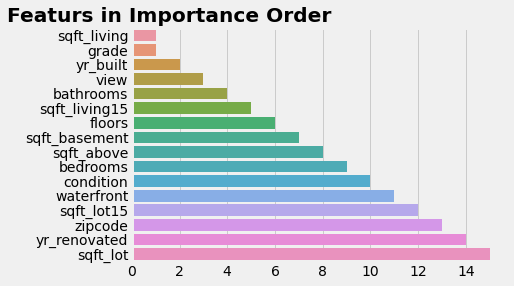

In [75]:
feature_list = list(zip(X, rfe_lr_ranking))
feature_list= sorted(feature_list, key=lambda x: x[1])

feature_list_x = []
feature_list_y = []
for i in range(len(feature_list)):
    feature_list_x.append(feature_list[i][0]) 
    feature_list_y.append(feature_list[i][1])

plt.title("Featurs in Importance Order", x=0.1, weight='bold')
sns.barplot(feature_list_y, feature_list_x)

In [99]:
feature_list_x_top5 = feature_list_x[:11]

X = df_without_extreme_outliers[feature_list_x_top5]
y = df_without_extreme_outliers['price']
# Standardize the features using (x - mean) / std
X_scaled = (X - X.mean()) / X.std()

In [100]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=327)

# Create LinearRegression model
lr_model = LinearRegression().fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)
# Check performance of LinearRegression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("------------ Liner Regression Model ------------")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R2: {lr_r2}")

------------ Liner Regression Model ------------
MAE: 116042.69595641737
MSE: 24397456776.237965
R2: 0.6336571259570033


In [101]:
# Create Lasso model
lasso_model = Lasso(alpha=172).fit(X_train, y_train)
# Predict
y_pred_lasso = lasso_model.predict(X_test)
# Check performance of LinearRegression model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("------------------- Lasso Model ----------------")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"R2: {lasso_r2}")

------------------- Lasso Model ----------------
MAE: 116050.47336633349
MSE: 24396832977.236614
R2: 0.6336664926840796


In [102]:
# Create LassoCV model
lassoCV_model = LassoCV(cv=kfold).fit(X_train, y_train)
# Predict
y_pred_lassoCV = lassoCV_model.predict(X_test)
# Check performance of LinearRegression model
lassoCV_mae = mean_absolute_error(y_test, y_pred_lassoCV)
lassoCV_mse = mean_squared_error(y_test, y_pred_lassoCV)
lassoCV_r2 = r2_score(y_test, y_pred_lassoCV)

print("------------------- LassoCV Model ----------------")
print(f"MAE: {lassoCV_mae}")
print(f"MSE: {lassoCV_mse}")
print(f"R2: {lassoCV_r2}")
print(f"Alpha: {lassoCV_model.alpha_}\n")

# Compare the train data and test data performance
y_pred_train_lassoCV = lassoCV_model.predict(X_train)
lassoCV_train_r2 = r2_score(y_train, y_pred_train_lassoCV)

print(f"R2: {lassoCV_train_r2}")

------------------- LassoCV Model ----------------
MAE: 116050.48910812363
MSE: 24396842078.828693
R2: 0.6336663560180562
Alpha: 172.29735252261776

R2: 0.6272405099832348
